## Moidah Mystery with Bayesian Inference

![alt text](train.png)

 It’s the year 1927, and many people are on the famous “Little Railroad” from Kansas City, MS to Poughkeepsie, NY. Colonel Cancer is the first one to step foot onto the train and sit right next to the window. He took a deep breath before hearing a familiar voice saying, “Hey stranger ;)”. Colonel then gives the brightest smile,
“Long time no see Sergeant! How’s the morning treating you?”

Sergeant Sagittarius smiled right back,
“Same as always, like shit.”

Then the two laugh as Sergeant sat next to Colonel. A couple minutes go by and Viscount Virgo along with Penelope Pisces enter the train. They did a slight nod to each other before separating to different seats. 

All the current passengers suddenly heard someone boasting loudly outside the station. She was discussing with another stranger as they were both entering the train,
“Did you know, I was the one who reported the first crime scene in Hartville? The murder was devastating but I am quite remarkable for being the first woman to talk about something so..unusual for a woman. Oh! And by the way, it’s Guinevere Gemini, never forget that ;) and you are again…?”

The man rolled his eyes before repeating himself,
“Lady! I don’t care who you are, just stop talking to me and sit far far away from me!  And for the last time, my name is Leonardo Forger, and I hope this is the last time we meet!” Guinevere scoffs and  sits down next to Penelope.

When everyone sat down, the train conductor announced the next stop before promptly moving the train. 

As Guinevere was about to boast about her work again, Penelope hesitantly stopped her,
“Sorry ma’am, I must attend to the ladies room,” and takes her stuff with her to an empty seat far from her.

Meanwhile, Viscount sits at the front row contemplating if this detective job is the right career for him. He realized that he wants to soon live the quiet life of being a farmer rather than solving for crimes and being at risk of not being there for his family. 

Just then the lights went off for a brief second before coming back on. At that point, everyone heard the loudest scream from Guinevere and all ran towards her by the food cart. There they see Sergeant Sagitarrius dead with an open bullet wound.

#### Your task is to figure out who killed Sergeant Sagitarrius.


## Meeting the Suspects
Everyone gathers around and at first freaks out. Guinevere is still screaming while Penelope is trying to calm her down. Leonardo paces back and forth, shaking while saying to himself “Holy  Shit!” and Colonel is frozen in place seeing his best man dead at the scene.

“Alright everyone calm down! My name is Detective Viscount Virgo and I will figure out who murdered this innocent man. Does anyone have any prior knowledge about him? I’m also going to have to ask where everyone was located and what you were doing at the time of the murder.”

At first everyone was uncomfortably silent until Guinevere spoke,
“Well! It wasn’t me! I just wanted some coffee to start my day and next thing I know, I see a man that just bit the dust!”

Leo interjected,
“Ahh maybe it was you since you’re the only one that was there when this fella died!”

Guinevere scoffed,
“How dare you, you  dummy! Do you know who I even am?! I am…”

“I don’t care! No one cares about you! Just shut up and confess..”

“Enough!” Viscount yelled, “Fighting and jumping to accusations without evidence will do nothing to find out who is the murderer. If anyone else does not want to die, we need to figure out who in this train murdered this person. My partner will be assisting me in this investigation as well. Everyone, meet Penelope Pisces. She will give out the data of who’s most likely to be the murderer.”

Everyone understood and complied. Viscount continued,
“Now, everyone must discuss what happened, who they are and where they were during the time of the murder. Guinevere, you first”


In [22]:
import numpy as np
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import corner
from scipy import stats

#### Let's go ahead and start by importing our incriminating data

In [27]:
data = pd.read_csv('the_book.csv')

Cool! Now let's consider who we think is most likely to be a murderer.
### An Introduction to Priors and Bayes' Theorem
We're going to use Bayesian inference to solve our murder. Bayes' Theorem can be given as:
$$P(X|Y) = \frac{P(Y|X) P(X)}{P(Y)}$$

The part we want to focus on for making an initial guess of the murderer is the prior. This encodes our prior beliefs into the equation. For example, if we think that everyone is likely to have commited the murder, then we can assume a **uniform prior**. Try plotting one below! Here's a helpful table to see which range of numbers corresponds to each suspect:
| Name                 | Range |
| -------------------- | ----- |
| Viscount Virgo       | 0-10  |
| Penelope Pisces      | 11-20 |
| Leonardo (Leo) Forger| 21-30 |
| Colonel Cancer       | 31-40 |
| Guinevere Gemini     | 41-50 |

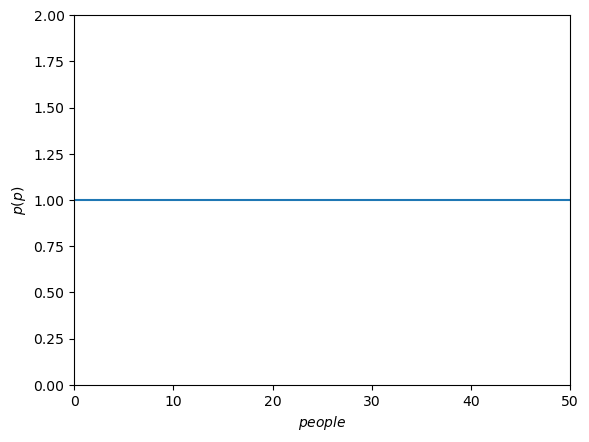

In [23]:
# let's make a uniform prior! This is very easy and can be done without the PyMC package, but we'll use that later :)

m = 200
p = np.linspace(0,50, m)
uniform_prior = np.ones(m)

# which looks something like this!
plt.plot(p, uniform_prior)
plt.xlabel(r'$people$')
plt.ylabel(r'$p(p)$')
plt.ylim(0,2)
plt.xlim(0,50)
plt.show()


Nice! Now let's see what our prior looks like if we immediately wanted to consider someone a suspect. Let's assign that person a gaussian prior with a standard deviation of 5 and a mean equal to the median of that person's range. For this example, we will pick the ever-suspicious Penelope Pisces!

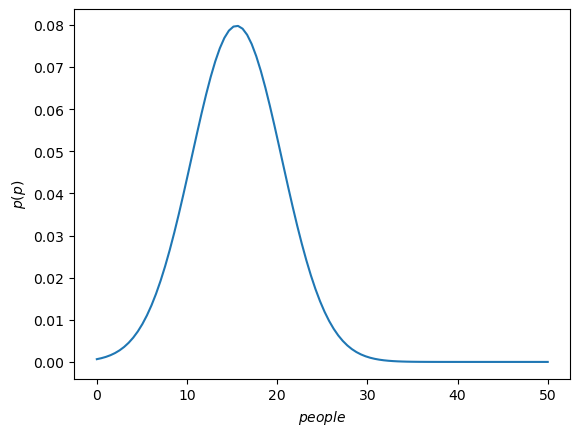

In [25]:
xs = np.linspace(0,50,100)
y_model = stats.norm.pdf(x=xs,loc=np.median(np.linspace(11,20,50)),scale=5)
plt.plot(xs,y_model)
plt.xlabel(r'$people$')
plt.ylabel(r'$p(p)$')
plt.show()

Now let's try to see what our observations say! Is Penelope Pisces implicated? Is she the.... 
### MURDERER???

Probably not! It's rude to judge someone for being so innocent. Let's load in our observations from Leo and see what they say...

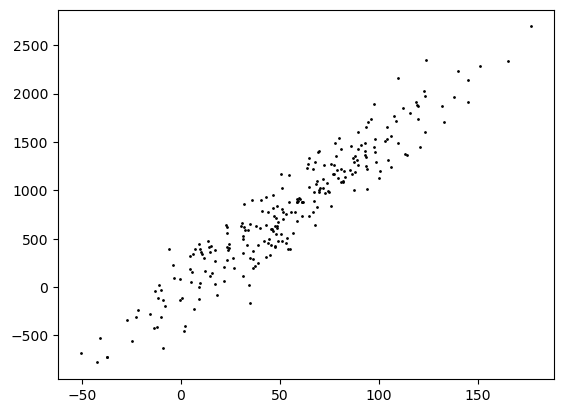

In [36]:
plt.scatter(data['WHISKY'],data['VODKA'],1,color='k')
#plt.xlim(0,50)
plt.show()

#### Hey! That looks pretty linear! Let's fit a line to it assuming that the intercept is 0.

In [41]:
# now we're going ot use PyMC to do some linear regression :)
x = data['WHISKY'].values
y = data['VODKA'].values

xs = np.linspace(min(x),max(x),1000)

with pm.Model() as model:
    # let's make our priors, this time with PyMC
    m = pm.Uniform('m',lower=min(x),upper=max(x))

    # let's make our model, y = m * x
    y_mod = m*x

    # let's create a determinsitic variable
    y_plot = pm.Deterministic('y_plot',m*xs)

    # now let's obtain likelihoods for our data
    lnlike = pm.Normal('lnlike', mu=y_mod, sigma=1, observed=y)

with model:    
    trace = pm.sample(tune=8000, draws=1000, chains=2, target_accept=0.9, return_inferencedata=True)


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: DropDims{axis=0}([250])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error__7ttn_yr


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: DropDims{axis=0}([250])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_v00fd8l6


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: DropDims{axis=0}([250])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_885oof0_


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_ce8aes3q


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_mofprmeh


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_nbvgmu0t


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Gt(1.0, 0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131, in ma


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_90gvbba5


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_n1thqohi


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/lin


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_w0v2c961


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_yyxu9dmn


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", l


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_ei8gzxfm


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_0lr5zcyl


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(227.88035786440497)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_jiab_tuo


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(-50.765758202258766, 177.1145996621462)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytenso


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_yvqw5o_j


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Gt(1.0, 0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131, in ma


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_z9axroul


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_os1oui94


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/lin


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_392bdb5l


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error__8emdn2y


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", l


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_3m97j2fw


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_bkf3ya0l


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(227.88035786440497)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_itf98_ra


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(-50.765758202258766, 177.1145996621462)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytenso


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_agsy_n_q


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Gt(1.0, 0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131, in ma


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_4gxcahjl


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_lc0_6jl_


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/lin


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_ll77jhka


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_hr7m7pyk


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", l


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_4mnayg3g


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_o7p1ck8q


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(227.88035786440497)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_lri70g28


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Le(-50.765758202258766, 177.1145996621462)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytenso


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error__glupt2q


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_aip9uky8


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/lin


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_y3kg7e13


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_23j1g6zt


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", l


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_311b2upc


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_p_rgtk9_


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Log(227.88035786440497)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_rq6j93fz


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_cdx2qg4s


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(1.0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", li


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_9ep2xbnb


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(6.283185307179586)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/lin


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_ywxszf6j


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_wo694n7e


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: ExpandDims{axis=0}(-0.5)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", l


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error_ynvu7biz


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(2)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1914, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/graph/rewriting/basic.py", line 1074, in transform
    return self.fn(fgraph, node)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/tensor/rewriting/basic.py", line 1138, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/opt/homebrew/Caskroom/miniforge/base/envs/DSFP/lib/python3.8/site-packages/pytensor/link/c/op.py", line 131,


You can find the C code in this temporary file: /var/folders/5k/6s6cy97n0zsbknr6hwcn87p80000gr/T/pytensor_compilation_error__f5pmsqf


KeyboardInterrupt: 

Nice! We've made our lovely little model and now let's plot our posteriors!

In [ ]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.scatter(data['x'],data['y'],color='k', label='Observed Data')
plt.show()

## DID PENELOPE KILL SGT. SAGITTARIUS??

Let's try to see if we can find more clues on what data we should use....

## The Final Fit

The time has come! Let's see if we can identify the murderer using the data that Penelope provided. First, let's take a look at it...

In [ ]:
# let's plot our data!
plt.scatter(data['phi'],data['y'],color='r')
plt.xlabel('people')
plt.ylabel('alcohol')
plt.show()

This looks like it could be fit well by a sinusoid! Let's use that as our model and try to see if we can identifier the murderer!


In [ ]:
# we'll be using PyMC again to accomplish this
